In [1]:
# print(K.tensorflow_backend._get_available_gpus())
from __future__ import absolute_import, division, print_function, unicode_literals
#
import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device,True)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Reshape,Attention,MaxPool1D,Dense, Conv1D, Convolution2D, GRU, LSTM, Bidirectional, TimeDistributed,
                          Dropout, Flatten, LayerNormalization,RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
#from keras_self_attention import SeqSelfAttention

from sklearn.preprocessing import StandardScaler

In [3]:
from utils.keras_OneCycle import OneCycle

Using TensorFlow backend.


In [4]:
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
scaler = StandardScaler()

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

x_train = scaler.fit_transform(x_train.astype('float32')) 
x_test = scaler.transform(x_test.astype('float32'))

In [7]:
x_train = np.atleast_3d(x_train)
x_test = np.atleast_3d(x_test)

In [8]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/

/Users/qinshuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path

In [10]:
import warnings
warnings.filterwarnings('ignore')
import imp
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import codes.analysis.rnn as rnn
import codes.util as util
import codes.analysis.machine_learning as ml
import codes.analysis as an
import codes.processing as p
import codes.viz as viz
import codes.util.input_output as io_transfer

In [11]:
imported = {'data': io.matlab.loadmat('./Raw_Data/Data.mat'),
            'validation_data': io.matlab.loadmat('Raw_Data/loop_1.mat')}

# extracts the important information from the raw data
raw = {'voltage': imported['data']['Voltagedata_mixed'],
       'piezoresponse': imported['data']['Loopdata_mixed'],
       'amplitude': imported['data']['OutA2_mixed'],
       'phase': imported['data']['OutPhi1_mixed'],
       'resonance': imported['data']['Outw2_mixed'],
       'quality_factor': imported['data']['OutQ2_mixed'],
       'val_piezoresponse': imported['validation_data']['piezo_1'],
       'val_resonance': imported['validation_data']['resonance_loop_1']}

In [12]:
p.filters.range_filter(raw['resonance'], [1300, 1340])
p.filters.range_filter(raw['val_resonance'], [1300, 1340])

# interpolates data that is non-real. This happens when the SHO fit fails
interpolated = {'voltage': raw['voltage'],
                'piezoresponse': p.filters.clean_interpolate(raw['piezoresponse'],
                                                             'linear').reshape(-1, raw['piezoresponse'].shape[2]),
                'amplitude': p.filters.clean_interpolate(raw['amplitude'],
                                                         'linear').reshape(-1, raw['amplitude'].shape[2]),
                'phase': p.filters.clean_interpolate(raw['phase'],
                                                     'linear').reshape(-1, raw['phase'].shape[2]),
                'resonance': p.filters.clean_interpolate(raw['resonance'],
                                                         'linear').reshape(-1, raw['resonance'].shape[2]),
                'quality_factor': p.filters.clean_interpolate(raw['quality_factor'],
                                                              'linear').reshape(-1, raw['quality_factor'].shape[2]),
                'val_piezoresponse': p.filters.clean_interpolate(raw['val_piezoresponse'],
                                                                  'linear').reshape(-1, raw['val_piezoresponse'].shape[2]),
                'val_resonance': p.filters.clean_interpolate(raw['val_resonance'],
                                                             'linear').reshape(-1, raw['val_resonance'].shape[2])}
# Uses Savitzky-Golay filter to remove outlier points
sg_filtered = {'voltage': raw['voltage'],
               'piezoresponse': p.filters.savgol(interpolated['piezoresponse'], fit_type='linear'),
               'amplitude': p.filters.savgol(interpolated['amplitude'], fit_type='linear'),
               'phase': p.filters.savgol(interpolated['phase'], fit_type='linear'),
               'resonance': p.filters.savgol(interpolated['resonance'], fit_type='linear'),
               'quality_factor': p.filters.savgol(interpolated['quality_factor'], fit_type='linear'),
               'val_piezoresponse': p.filters.savgol(interpolated['val_piezoresponse'], fit_type='linear'),
               'val_resonance': p.filters.savgol(interpolated['val_resonance'], fit_type='linear')}

# normalized the data. This is important for training Neural Networks
normalized = {'voltage': raw['voltage'],
              'piezoresponse': p.filters.normalize(sg_filtered['piezoresponse']),
              'amplitude': p.filters.normalize(sg_filtered['amplitude']),
              'phase': p.filters.normalize(sg_filtered['phase']),
              'resonance': p.filters.normalize(sg_filtered['resonance']),
              'quality_factor': p.filters.normalize(sg_filtered['quality_factor']),
              'val_piezoresponse': p.filters.normalize(sg_filtered['val_piezoresponse'],
                                                       sg_filtered['piezoresponse']),
              'val_resonance': p.filters.normalize(sg_filtered['val_resonance'],
                                                   sg_filtered['resonance'])}

In [13]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.22.1


In [14]:
X = np.atleast_3d(normalized['piezoresponse'])
Y = np.atleast_3d(normalized['val_piezoresponse'])

In [15]:
def Conv_1D_Block(X, size, n_step, drop_frac, l1_norm):
    X_shortcut = X
    x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
# x = Conv1D(128, 3, activation='relu', padding='same')(x)
# encoded = MaxPooling1D(2, padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    encoded = Bidirectional(LSTM(32, return_sequences=False))(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    embedding = Dense(24, activation='relu',activity_regularizer=l1(1e-3))(encoded)
    repeat = RepeatVector(128)(embedding)
    x = tf.transpose(repeat, (0, 2, 1)) 
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    decoded = Conv1D(1, 3, activation='linear', padding='same')(x)
#x = UpSampling1D(2)(x)


    model = Model(input_img, decoded,name = 'Convolutional_1D_with_Attention')
    model.compile(Adam(2e-5), loss='mse')
    return model
    

Lstm autoencoder resnet model

In [16]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'enconde' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)

    

    X = layers.add([X, X_shortcut])
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    X = layers.Activation('relu')(X)

    return X


def decode_identity_block(X, stage, block, size, n_step, drop_frac, l1_norm):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'decode' + str(stage) + block + '_branch'

    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)
    # 

    X = layers.add([X, X_shortcut])
   # X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    X = layers.Activation('relu')(X)

    return X


def ResNet50(lr=3e-5, size=128, drop_frac=0, n_step=96, embedding=16, l1_norm=1e-5):
    X_input = layers.Input(shape=(n_step, 1))
    X = X_input

    X = encode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = encode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.Bidirectional(LSTM(size, return_sequences=False, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)), input_shape=(n_step, 1))(X)
    #X = layers.BatchNormalization(axis=1, name='last_encode')(X)
    X = layers.Activation('relu')(X)
    X = layers.Dense(embedding, activation='relu', name='embedding_layer', activity_regularizer=l1(l1_norm))(X)
    X = layers.RepeatVector(n_step)(X)

    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac,
                                  activity_regularizer=l1(l1_norm)))(X)

    # X = layers.BatchNormalization(axis = 1, name = 'fires_decode')(X)
    X = layers.Activation('relu')(X)

    X = decode_identity_block(X, 2, 'b', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'c', size, n_step, drop_frac, l1_norm)
    X = decode_identity_block(X, 2, 'd', size, n_step, drop_frac, l1_norm)

    X = layers.BatchNormalization(axis=1, name='batch_normal')(X)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    model.compile(Adam(lr), loss='mse')

    return model

Convolutional 1D with Attention model

In [58]:
def Conv_Atten():
    input_img = Input(shape=(96, 1))  

#x = Dense(128, activation='relu')(input_img)

    x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = MaxPooling1D(2, padding='same')(x)
# x = Conv1D(128, 3, activation='relu', padding='same')(x)
# encoded = MaxPooling1D(2, padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    encoded = Bidirectional(LSTM(32, return_sequences=False))(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
    embedding = Dense(24, activation='relu',activity_regularizer=l1(1e-3))(encoded)
    repeat = RepeatVector(128)(embedding)
    x = tf.transpose(repeat, (0, 2, 1)) 
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = tf.transpose(x, (0, 2, 1)) 
    x = Attention()([x,x])
    x = tf.transpose(x, (0, 2, 1)) 
    x = UpSampling1D(2)(x)
    decoded = Conv1D(1, 3, activation='linear', padding='same')(x)
#x = UpSampling1D(2)(x)


    model = Model(input_img, decoded,name = 'Convolutional_1D_with_Attention')
    model.compile(loss='mse',optimizer='SGD')
    return model

In [59]:
Try = Conv_Atten()

In [60]:
Try.summary()

Model: "Convolutional_1D_with_Attention"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 96, 128)      512         input_5[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_transpose_40 (Tenso [(None, 128, 96)]    0           conv1d_20[0][0]                  
__________________________________________________________________________________________________
attention_16 (Attention)        (None, 128, 96)      0           tf_op_layer_transpose_40[0][0]   
                                                                 tf_

In [25]:
cd Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks/


/Users/qinshuyu/497_MAT_Assignment/Revealing-Ferroelectric-Switching-Character-Using-Deep-Recurrent-Neural-Networks


In [39]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot



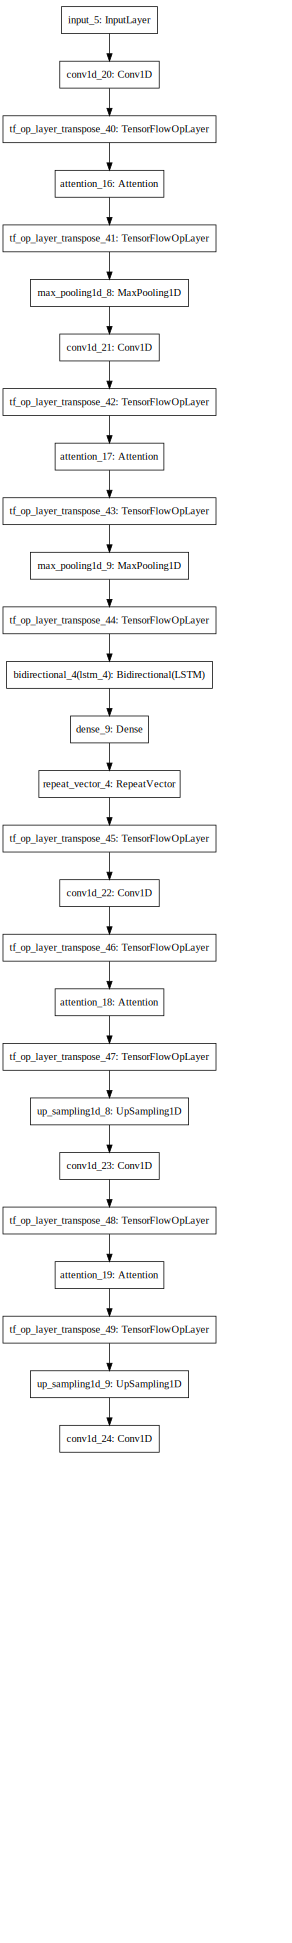

In [64]:
SVG(model_to_dot(Try).create(prog='dot', format='svg'))

In [49]:
input_img = Input(shape=(96, 1))  

#x = Dense(128, activation='relu')(input_img)

x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = MaxPooling1D(2, padding='same')(x)
# x = Conv1D(128, 3, activation='relu', padding='same')(x)
# encoded = MaxPooling1D(2, padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
encoded = Bidirectional(LSTM(32, return_sequences=False))(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
embedding = Dense(24, activation='relu',activity_regularizer=l1(1e-3))(encoded)
repeat = RepeatVector(128)(embedding)
x = tf.transpose(repeat, (0, 2, 1)) 
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = UpSampling1D(2)(x)
x = Conv1D(128, 3, activation='relu', padding='same')(x)
x = tf.transpose(x, (0, 2, 1)) 
x = Attention()([x,x])
x = tf.transpose(x, (0, 2, 1)) 
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='linear', padding='same')(x)
#x = UpSampling1D(2)(x)


model = Model(input_img, decoded,name = 'Convolutional_1D_with_Attention')
model.compile(loss='mse')

In [61]:
sched = OneCycle(min_lr=5e-5, max_lr=1e-2, min_mtm = 0.85, max_mtm = 0.95, annealing_stage=0.1, 
                 annealing_rate=0.01,training_iterations=np.ceil(((X.shape[0]*5)/(180))))

In [62]:
X.shape[0]

3600

In [63]:
Try.fit(X, X, batch_size=180, epochs=5, callbacks=[sched])

Train on 3600 samples
Epoch 1/5
3600/3600 [==============================] - 10s 3ms/sample - loss: 1.0002
Epoch 2/5
3600/3600 [==============================] - 7s 2ms/sample - loss: 1.0001
Epoch 3/5
3600/3600 [==============================] - 7s 2ms/sample - loss: 0.9999
Epoch 4/5
3600/3600 [==============================] - 7s 2ms/sample - loss: 0.9997
Epoch 5/5
3600/3600 [==============================] - 7s 2ms/sample - loss: 0.9997
